In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

In [3]:
train_values.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [4]:
# train_values.hist()
# plt.rcParams["figure.figsize"] = [220,150]
# plt.show()

In [5]:
# scatter_matrix(train_values)
# plt.show()

In [6]:
for each in train_values.columns:
    print (each)


patient_id
slope_of_peak_exercise_st_segment
thal
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina


In [7]:
features = train_values[train_values.columns[1:]]

In [8]:
response = train_labels['heart_disease_present']
response.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [12]:
# features x
# response variable y

X = features
y = response

In [13]:
X = pd.get_dummies(X,drop_first=True)

In [15]:
for each in X.columns:
    print(each)

slope_of_peak_exercise_st_segment
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina
thal_normal
thal_reversible_defect


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=21, stratify=y)

In [17]:
knn = KNeighborsClassifier(n_neighbors=6)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
#print("test set: \n {}".format(y))

In [21]:
knn.score(X_test,y_test)

0.5317460317460317

In [98]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)

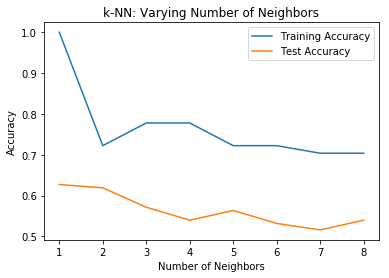

In [99]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

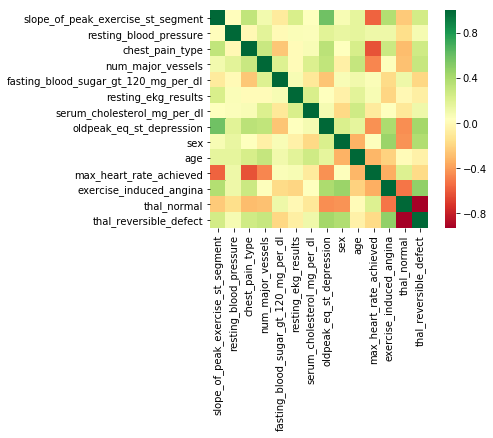

In [105]:
sns.heatmap(X_train.corr(), square=True, cmap='RdYlGn')

In [106]:
reg = LinearRegression()

In [109]:
blood_pressure = df_t['resting_blood_pressure']

In [110]:
prediction_space = np.linspace(min(blood_pressure), max(blood_pressure)).reshape(-1,1)

In [111]:
type(blood_pressure.values), type(y.values)

(numpy.ndarray, numpy.ndarray)

In [112]:
reg.fit(blood_pressure.values.reshape(-1,1), y.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
y_pred = reg.predict(prediction_space)

In [114]:
#r^2
#rmse would be that square rooted 
print(reg.score(blood_pressure.values.reshape(-1,1), y.values.reshape(-1,1)))

0.006163150497091929


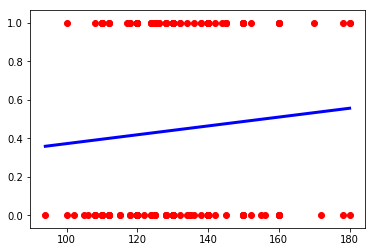

In [115]:
plt.scatter(blood_pressure, y, color='r')
plt.plot(prediction_space, y_pred, color='b', linewidth=3)
plt.show()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7, random_state=42)

In [122]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [123]:
print("R^2: ", reg_all.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
      

R^2:  0.28607387577952936
RMSE:  0.41905073915692526


In [130]:
cv_scores = cross_val_score(reg,X,y,cv=5 )
cv_scores

array([0.41549659, 0.51221118, 0.62573691, 0.32296953, 0.18949056])

In [131]:
np.mean(cv_scores)

0.4131809542077504

In [132]:
lasso = Lasso(alpha=0.4, normalize=True)

In [133]:
lasso.fit(X,y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [134]:
lasso_coef = lasso.coef_
lasso_coef

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,
        0.])

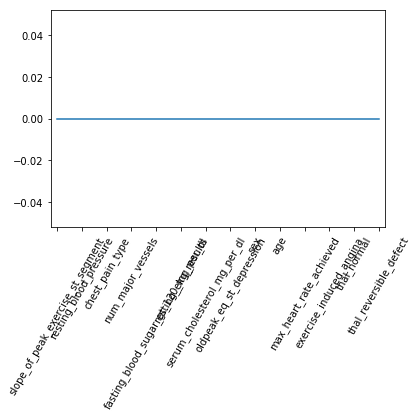

In [135]:
plt.plot(range(len(df_t.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [175]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [176]:
ridge = Ridge(normalize=True)

In [177]:
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [178]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

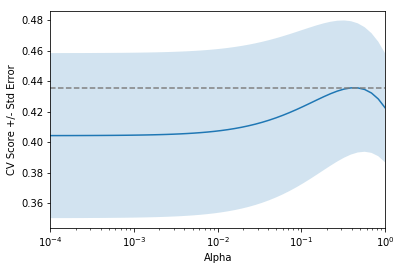

In [179]:
display_plot(ridge_scores, ridge_scores_std)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=42)

In [181]:
knn = KNeighborsClassifier(n_neighbors=6)

In [182]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [183]:
y_pred = knn.predict(X_test)

In [184]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[60 11]
 [42 13]]
             precision    recall  f1-score   support

          0       0.59      0.85      0.69        71
          1       0.54      0.24      0.33        55

avg / total       0.57      0.58      0.53       126



In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=42)

In [186]:
logreg = LogisticRegression()

In [187]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
y_pred = logreg.predict(X_test)

In [189]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59 12]
 [15 40]]
             precision    recall  f1-score   support

          0       0.80      0.83      0.81        71
          1       0.77      0.73      0.75        55

avg / total       0.79      0.79      0.78       126



In [190]:
y_pred_prob =logreg.predict_proba(X_test)[:,1]
fpr, tpr, threasholds = roc_curve(y_test, y_pred_prob)


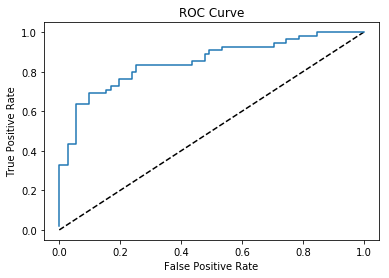

In [191]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [192]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.849167733674776


In [193]:
cv_auc = cross_val_score(logreg, X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.83125  0.921875 0.990625 0.80625  0.896875]


In [194]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [195]:
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X,y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.85


In [199]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [200]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}


In [201]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X,y)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe706896f60>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe6eef33400>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [203]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.7833333333333333


In [204]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

In [205]:
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7, random_state=42)

In [206]:
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7777777777777778


In [210]:
from sklearn.linear_model import ElasticNet

In [211]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [215]:
l1_space = np.linspace(0, 1, 100)
param_grid = {'l1_ratio': l1_space}

In [216]:
elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train, y_train)
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/home/anna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.33839947041500273
Tuned ElasticNet MSE: 0.16540013239624932


/home/anna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
